# Supervised Learning Project

## The classification goal is to predict the likelihood of a liability customer buying personal loans.


In [729]:
#importing the required libraries
import pandas as pd
import numpy as np

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt  
sns.set(color_codes=True)        #adds color background (have to kill the kernel to see the changes of color)
%matplotlib inline 

#For scientific computations
from scipy import stats

#For model building
from sklearn.model_selection import train_test_split      #to split data into train and test

from sklearn.linear_model import LogisticRegression       #For logistic regression model
from sklearn.naive_bayes import GaussianNB                #For Naive Bayes model
from sklearn.neighbors import KNeighborsClassifier        #For KNN classifier model

from sklearn import preprocessing                         #For standardization

from sklearn import metrics                               #For classfication report, confusion matrix, score etc

from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support


## Step 1: Read the column description and ensure you understand each attribute well

In [730]:
indata = pd.read_csv('C:\\Users\\Rakesh Gowda S N\\Documents\\Projects\\Project 2 - SML\\Bank_Personal_Loan_Modelling.csv')
indata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [731]:
print('Shape of data:')
print(indata.shape)
print('')
print('Data types:')
indata.dtypes

Shape of data:
(5000, 14)

Data types:


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [732]:
print('More info on data:')
indata.describe().transpose()

More info on data:


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Step 2: Study the data distribution in each attribute.
## Step 3: Get the target column distribution.

In [733]:
#Start EDA
#Check for missing values
indata.isnull().sum()
#indata.isnull().values.any()         #can also be used to check presence of missing values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [734]:
print('There are no missing values in any of the columns.')

There are no missing values in any of the columns.


In [735]:
#To check negative values in Experience column
indata[indata.Experience<0].Experience.value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [736]:
#Since there are only 3 unique negative values we can fill them up with 0 instead of mean. (Also values are close to 0)

indata1 = indata.copy()                               #to avoid affecting main dataset
indata1.loc[indata.Experience<0,'Experience']=0

print("Negative Experience in original dataset is {0:0.0f}.".format(indata[indata['Experience'] <0 ]['Experience'].count()))
#print('')
print("Negative Experience after filling zeroes is {0:0.0f}.".format(indata1[indata1['Experience'] <0 ]['Experience'].count()))

Negative Experience in original dataset is 52.
Negative Experience after filling zeroes is 0.


In [737]:
#Dropping unwanted columns
indata1.drop(['ID','ZIP Code'],axis=1 ,inplace=True)
indata1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [738]:
print('As per above data currently we have: ')
print('1. Five numeric variables (Age, Experience, Income, CCAvg and Mortgage).')
print('2. Two categorical variables (Family and Education).')
print('3. Five boolean variables (Personal Loan, Securities Account, CD Account, Online and CreditCard).')

As per above data currently we have: 
1. Five numeric variables (Age, Experience, Income, CCAvg and Mortgage).
2. Two categorical variables (Family and Education).
3. Five boolean variables (Personal Loan, Securities Account, CD Account, Online and CreditCard).


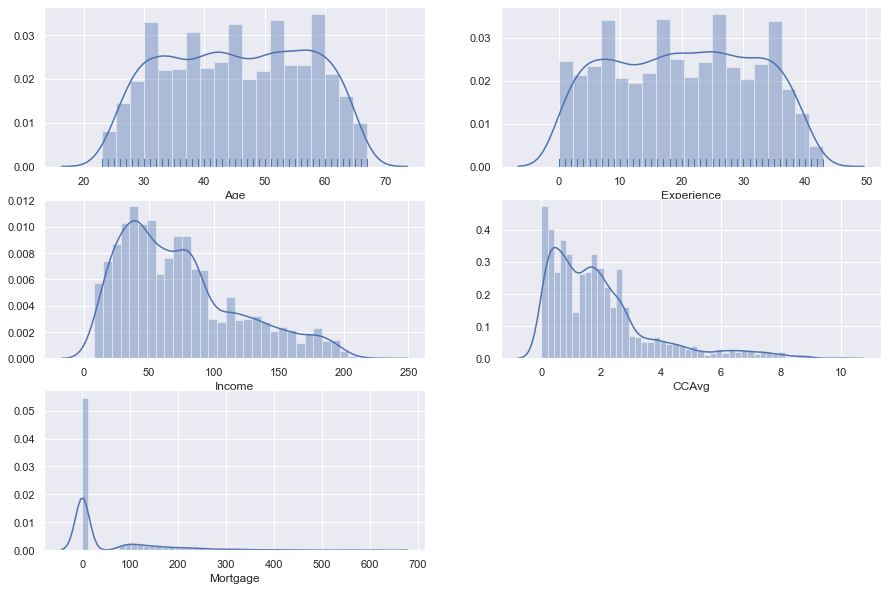

In [739]:
#Univariate analysis

plt.figure(figsize= (15,10));

plt.subplot(3,2,1);
sns.distplot(indata1['Age'],rug=True);

plt.subplot(3,2,2);
sns.distplot(indata1['Experience'],rug=True);

plt.subplot(3,2,3);
sns.distplot(indata1['Income'],rug=False);

plt.subplot(3,2,4);
sns.distplot(indata1['CCAvg'],rug=False);

plt.subplot(3,2,5);
sns.distplot(indata1['Mortgage']);

In [740]:
print('From the above plots we can see that:')
print('1. The spread of data in Age and Experience column is almost even but irregular.')
print('2. Data in Income and CCAvg are mostly right skewed.')

From the above plots we can see that:
1. The spread of data in Age and Experience column is almost even but irregular.
2. Data in Income and CCAvg are mostly right skewed.


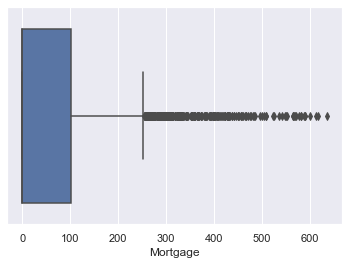

In [741]:
#Since Mortgage distribution was unclear
sns.boxplot(indata1['Mortgage']);

In [742]:
print('There is a presence of outliers in Mortgage column and hence outlier treatment might be required if it has any impact on Personal Loan column.')

There is a presence of outliers in Mortgage column and hence outlier treatment might be required if it has any impact on Personal Loan column.


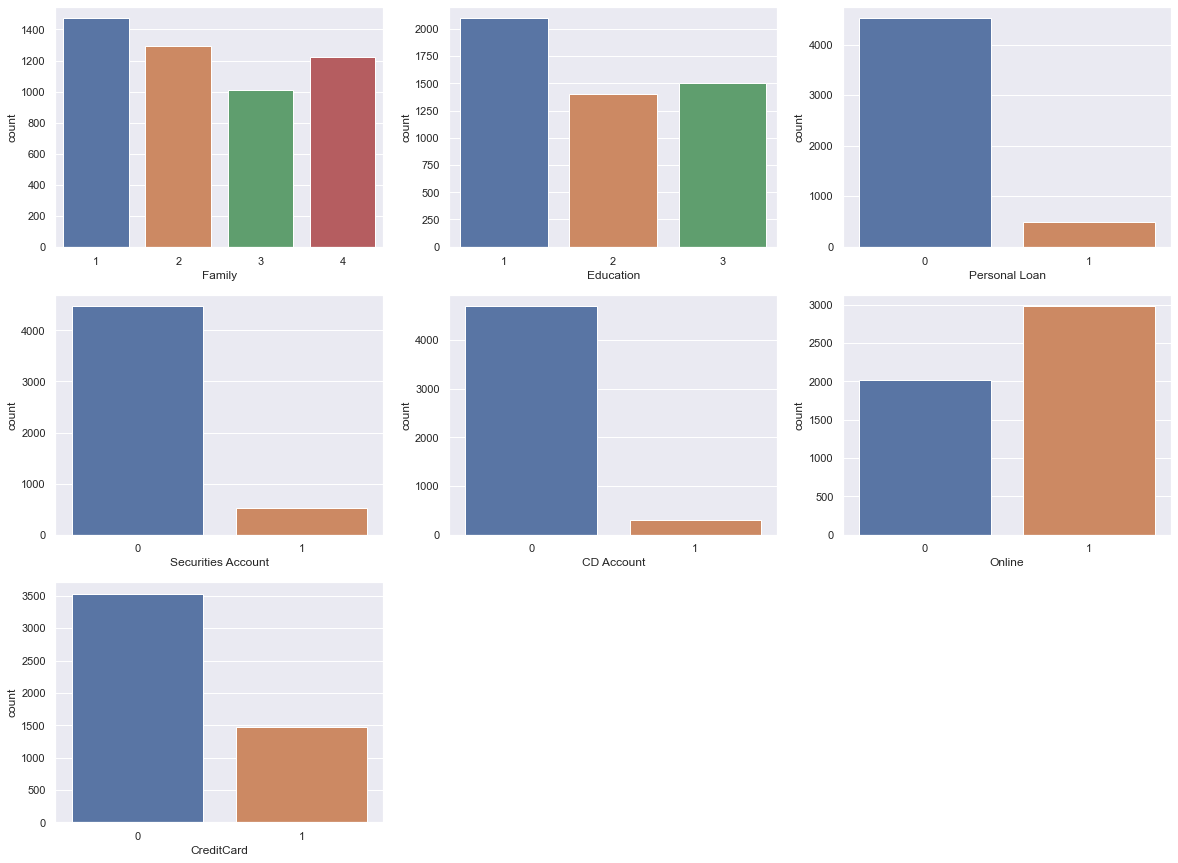

In [743]:
plt.figure(figsize= (20,15));

plt.subplot(3,3,1);
sns.countplot(indata1['Family']);

plt.subplot(3,3,2);
sns.countplot(indata1['Education']);

plt.subplot(3,3,3);
sns.countplot(indata1['Personal Loan']);

plt.subplot(3,3,4);
sns.countplot(indata1['Securities Account']);

plt.subplot(3,3,5);
sns.countplot(indata1['CD Account']);

plt.subplot(3,3,6);
sns.countplot(indata1['Online']);

plt.subplot(3,3,7);
sns.countplot(indata1['CreditCard']);

In [744]:
print('From the above data we observed that: ')
print('1. Almost similar number of customers are present across all family sizes.')
print('2. Customer base has more undergraduates compared to graduates and professionals.')
print('3. Very less number of customers have accepted personal loan.')
print('4. Only few customers have securities account and CD account with the bank.')
print('5. More customers use internet banking facilities.')
print('6. Most of the customers do not have credit card issued by Thera bank.')

From the above data we observed that: 
1. Almost similar number of customers are present across all family sizes.
2. Customer base has more undergraduates compared to graduates and professionals.
3. Very less number of customers have accepted personal loan.
4. Only few customers have securities account and CD account with the bank.
5. More customers use internet banking facilities.
6. Most of the customers do not have credit card issued by Thera bank.


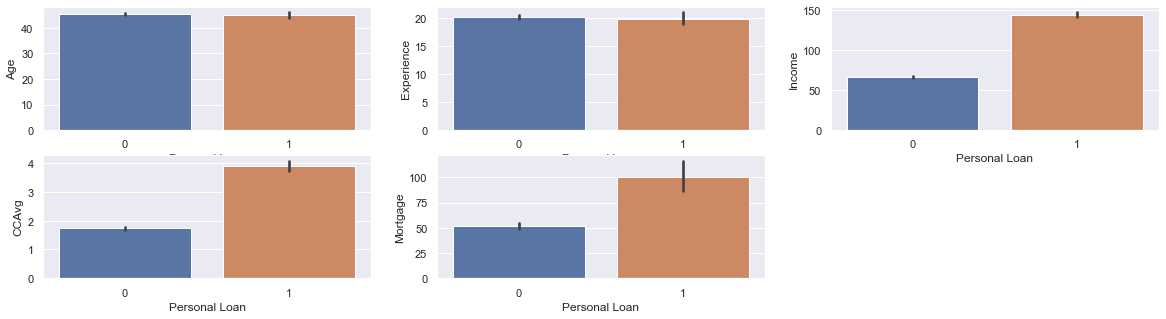

In [745]:
#Bivariate Analysis

#Numerical variables against target variable

plt.figure(figsize=(20,5))

plt.subplot(2,3,1)
#sns.violinplot(indata1['Personal Loan'], indata1['Age'])
sns.barplot(indata1['Personal Loan'], indata1['Age']);

plt.subplot(2,3,2)
sns.barplot(indata1['Personal Loan'], indata1['Experience']);

plt.subplot(2,3,3)
sns.barplot(indata1['Personal Loan'], indata1['Income']);

plt.subplot(2,3,4)
sns.barplot(indata1['Personal Loan'], indata1['CCAvg']);

plt.subplot(2,3,5)
sns.barplot(indata1['Personal Loan'], indata1['Mortgage']);

In [746]:
print('Observations from above plot are:')
print('1. Age and Experience does not seem to have much impact on personal loan.')
print('2. Personal loan is given to/accepted by customers with higher income, higher CCAvg and higher Mortgage.')
print('3. Since Mortgage has more outliers as observed earlier and has an impact on personal loan, we need to reduce outliers.')

Observations from above plot are:
1. Age and Experience does not seem to have much impact on personal loan.
2. Personal loan is given to/accepted by customers with higher income, higher CCAvg and higher Mortgage.
3. Since Mortgage has more outliers as observed earlier and has an impact on personal loan, we need to reduce outliers.


In [747]:
#Outlier treatment

indata1['Mortgage_z']=np.abs(stats.zscore(indata1['Mortgage']))
indata1=indata1[indata1['Mortgage_z']<3]            #since z score above 3 is termed as an outlier
#indata1.head()
indata2 = indata1.copy()
indata2.drop('Mortgage_z',axis=1,inplace=True);     #Have to execute from start else more rows will be dropped
indata2.shape

(4895, 12)

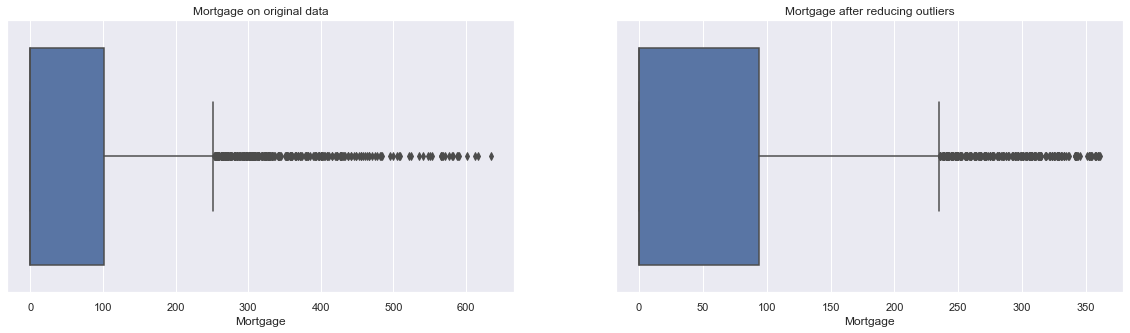

In [748]:
#Mortgage distribution after dropping rows to reduce outliers
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Mortgage on original data")
sns.boxplot(indata['Mortgage']);

plt.subplot(1,2,2)
plt.title("Mortgage after reducing outliers")
sns.boxplot(indata2['Mortgage']);

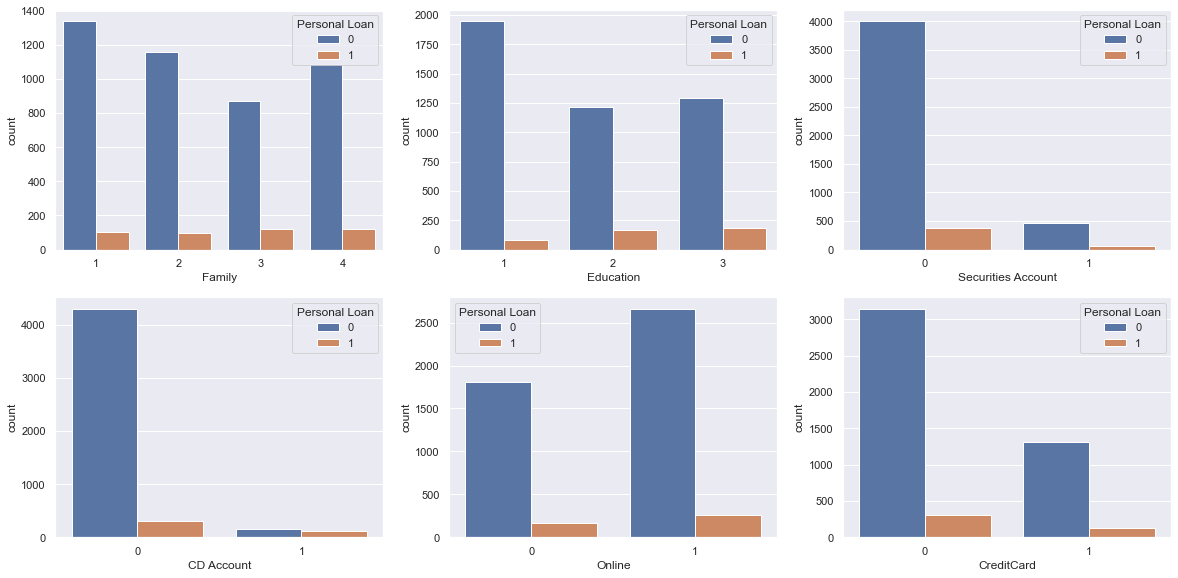

In [749]:
#Categorical and Boolean variables against target variable

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x='Family',data=indata2,hue='Personal Loan');

plt.subplot(3,3,2)
sns.countplot(x='Education',data=indata2,hue='Personal Loan');

plt.subplot(3,3,3)
sns.countplot(x='Securities Account',data=indata2,hue='Personal Loan');

plt.subplot(3,3,4)
sns.countplot(x='CD Account',data=indata2,hue='Personal Loan');

plt.subplot(3,3,5)
sns.countplot(x='Online',data=indata2,hue='Personal Loan');

plt.subplot(3,3,6)
sns.countplot(x='CreditCard',data=indata2,hue='Personal Loan');

In [750]:
print('Observations from above plot are:')
print('1. Family size does not seem to have much impact on personal loan.')
print('2. Very few undergraduates have taken Personal Loan compared to graduates and professionals.')
print('3. Negligible difference observed in customers having securities account, CD account, use online facilities and credit card taken against personal loan.')
print('4. Since we are not able to get much evidence from visual graphs, we will perform hypothesis testing.')

Observations from above plot are:
1. Family size does not seem to have much impact on personal loan.
2. Very few undergraduates have taken Personal Loan compared to graduates and professionals.
3. Negligible difference observed in customers having securities account, CD account, use online facilities and credit card taken against personal loan.
4. Since we are not able to get much evidence from visual graphs, we will perform hypothesis testing.


In [751]:
#Hypothesis testing (Family size against personal loan)
Ho = "Customers with larger family size has no effect in taking personal loan"           #Null hypothesis
Ha = "Customers with larger family size has an effect in taking personal loan"           #Alternate hypothesis

#Perform chi-squared test since both inputs are categorical in nature and mutually exclusive
crosstab = pd.crosstab(indata2['Family'],indata2['Personal Loan'])  # Contingency table

chi_stat, p_value, dof, exp = stats.chi2_contingency(crosstab)

#Assuming confidence interval as 95%
if p_value < 0.05:
    print(f'{crosstab}')
    print('')
    print(f'{Ha} as the p_value ({p_value}) < 0.05 and thus null hypothesis is rejected.')
else:
    print(f'{crosstab}')
    print('')
    print(f'{Ho} as the p_value ({p_value}) > 0.05 and thus null hypothesis is accepted.')

Personal Loan     0    1
Family                  
1              1340  100
2              1161   94
3               874  120
4              1087  119

Customers with larger family size has an effect in taking personal loan as the p_value (2.868580802943549e-05) < 0.05 and thus null hypothesis is rejected.


In [752]:
#Hypothesis testing (Education against personal loan)
Ho = "Customers with comparitively higher educational level has no effect in taking personal loan"     #Null hypothesis
Ha = "Customers with comparitively higher educational level an effect in taking personal loan"         #Alternate hypothesis

#Perform chi-squared test since both inputs are categorical in nature and mutually exclusive
crosstab = pd.crosstab(indata2['Education'],indata2['Personal Loan'])  # Contingency table

chi_stat, p_value, dof, exp = stats.chi2_contingency(crosstab)

#Assuming confidence interval as 95%
if p_value < 0.05:
    print(f'{crosstab}')
    print('')
    print(f'{Ha} as the p_value ({p_value}) < 0.05 and thus null hypothesis is rejected.')
else:
    print(f'{crosstab}')
    print('')
    print(f'{Ho} as the p_value ({p_value}) > 0.05 and thus null hypothesis is accepted.')

Personal Loan     0    1
Education               
1              1949   82
2              1218  166
3              1295  185

Customers with comparitively higher educational level an effect in taking personal loan as the p_value (2.174527912754905e-22) < 0.05 and thus null hypothesis is rejected.


In [753]:
#Hypothesis testing (Securities account against personal loan)
Ho = "Securities Account has no effect in taking personal loan"     #Null hypothesis
Ha = "Securities Account has an effect in taking personal loan"     #Alternate hypothesis

#Perform chi-squared test since both inputs are categorical in nature and mutually exclusive
crosstab = pd.crosstab(indata2['Securities Account'],indata2['Personal Loan'])  # Contingency table

chi_stat, p_value, dof, exp = stats.chi2_contingency(crosstab)

#Assuming confidence interval as 95%
if p_value < 0.05:
    print(f'{crosstab}')
    print('')
    print(f'{Ha} as the p_value ({p_value}) < 0.05 and thus null hypothesis is rejected.')
else:
    print(f'{crosstab}')
    print('')
    print(f'{Ho} as the p_value ({p_value}) > 0.05 and thus null hypothesis is accepted.')

Personal Loan          0    1
Securities Account           
0                   4005  379
1                    457   54

Securities Account has no effect in taking personal loan as the p_value (0.17193326908495593) > 0.05 and thus null hypothesis is accepted.


In [754]:
#Hypothesis testing (CD Account against personal loan)
Ho = "CD Account has no effect in taking personal loan"     #Null hypothesis
Ha = "CD Account has an effect in taking personal loan"     #Alternate hypothesis

#Perform chi-squared test since both inputs are categorical in nature and mutually exclusive
crosstab = pd.crosstab(indata2['CD Account'],indata2['Personal Loan'])  # Contingency table

chi_stat, p_value, dof, exp = stats.chi2_contingency(crosstab)

#Assuming confidence interval as 95%
if p_value < 0.05:
    print(f'{crosstab}')
    print('')
    print(f'{Ha} as the p_value ({p_value}) < 0.05 and thus null hypothesis is rejected.')
else:
    print(f'{crosstab}')
    print('')
    print(f'{Ho} as the p_value ({p_value}) > 0.05 and thus null hypothesis is accepted.')

Personal Loan     0    1
CD Account              
0              4301  312
1               161  121

CD Account has an effect in taking personal loan as the p_value (1.145783972242365e-94) < 0.05 and thus null hypothesis is rejected.


In [755]:
#Hypothesis testing (Online against personal loan)
Ho = "Customers using online facilities has no effect in taking personal loan"     #Null hypothesis
Ha = "Customers using online facilities has an effect in taking personal loan"     #Alternate hypothesis

#Perform chi-squared test since both inputs are categorical in nature and mutually exclusive
crosstab = pd.crosstab(indata2['Online'],indata2['Personal Loan'])  # Contingency table

chi_stat, p_value, dof, exp = stats.chi2_contingency(crosstab)

#Assuming confidence interval as 95%
if p_value < 0.05:
    print(f'{crosstab}')
    print('')
    print(f'{Ha} as the p_value ({p_value}) < 0.05 and thus null hypothesis is rejected.')
else:
    print(f'{crosstab}')
    print('')
    print(f'{Ho} as the p_value ({p_value}) > 0.05 and thus null hypothesis is accepted.')

Personal Loan     0    1
Online                  
0              1803  172
1              2659  261

Customers using online facilities has no effect in taking personal loan as the p_value (0.8211184262381276) > 0.05 and thus null hypothesis is accepted.


In [756]:
#Hypothesis testing (Credit card against personal loan)
Ho = "Customers using Credit card has no effect in taking personal loan"     #Null hypothesis
Ha = "Customers using Credit card has an effect in taking personal loan"     #Alternate hypothesis

#Perform chi-squared test since both inputs are categorical in nature and mutually exclusive
crosstab = pd.crosstab(indata2['CreditCard'],indata2['Personal Loan'])  # Contingency table

chi_stat, p_value, dof, exp = stats.chi2_contingency(crosstab)

#Assuming confidence interval as 95%
if p_value < 0.05:
    print(f'{crosstab}')
    print('')
    print(f'{Ha} as the p_value ({p_value}) < 0.05 and thus null hypothesis is rejected.')
else:
    print(f'{crosstab}')
    print('')
    print(f'{Ho} as the p_value ({p_value}) > 0.05 and thus null hypothesis is accepted.')

Personal Loan     0    1
CreditCard              
0              3145  307
1              1317  126

Customers using Credit card has no effect in taking personal loan as the p_value (0.8994714232255394) > 0.05 and thus null hypothesis is accepted.


1. Personal Loan distribution is highly skewed with positive skewness of 2.8994902390062385.
2. Personal Loan distribution is leptykurtic as kurtosis is 6.409662340356721.
3. From the data most of the customers do not take Personal loans.


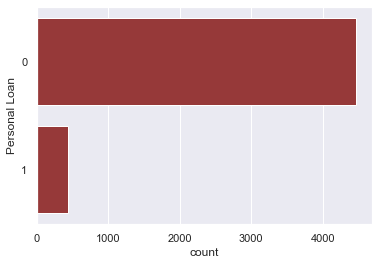

In [757]:
sns.countplot(y=indata2['Personal Loan'], color='brown');

skew = indata2['Personal Loan'].skew()
kurt = indata2['Personal Loan'].kurtosis()

#Skewness
if skew < -1 or skew > 1:
    if skew < -1:
        print(f'1. Personal Loan distribution is highly skewed with negative skewness of {skew}.')
    else:
        print(f'1. Personal Loan distribution is highly skewed with positive skewness of {skew}.')
        
elif (-1 < skew > -0.5) or (1 > skew > 0.5):
    if -1 < skew > -0.5:
        print(f'1. Personal Loan distribution is moderately skewed with negative skewness of {skew}.')
    else:
        print(f'1. Personal Loan distribution is moderately skewed with positive skewness of {skew}.')
    
else:
    print(f'1. Personal Loan distribution is approximately symmetric as skewness is {skew}.')

#print('')

#Kurtosis
if kurt < 3:
    print(f'2. Personal Loan distribution is platykurtic as kurtosis is {kurt}.')
elif kurt > 3:
    print(f'2. Personal Loan distribution is leptykurtic as kurtosis is {kurt}.')
else:
    print(f'2. Personal Loan distribution is mesokurtic and follows normal distribution as kurtosis is {kurt}.')
    
#print('')

print('3. From the data most of the customers do not take Personal loans.')

In [758]:
#sns.pairplot(indata2)

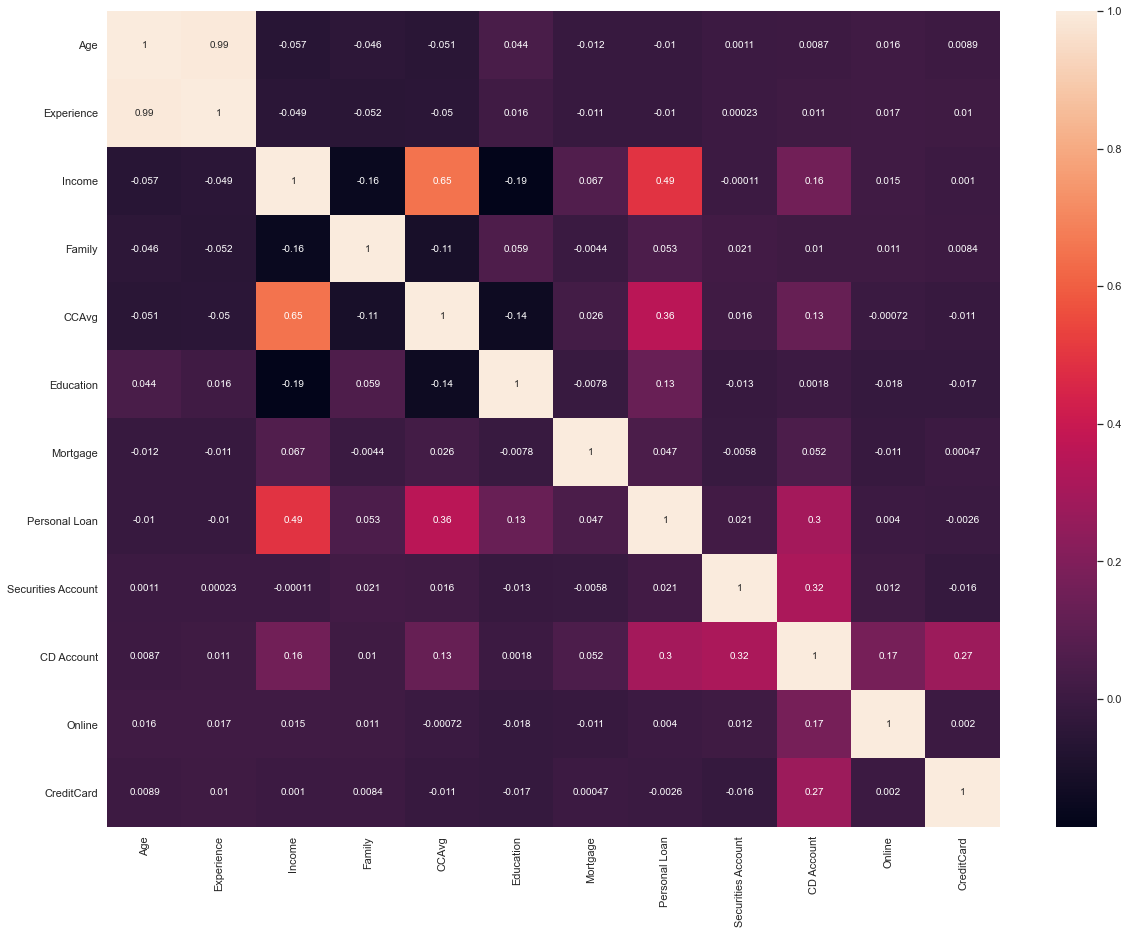

In [759]:
corrMat=indata2.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corrMat, annot=True);

In [760]:
print('From the above heatmap we can see that:')
print('1. There is a strong correlation between Age and Experience.')
print('2. Income has moderate correlation with CCAvg and target variable Personal Loan.')

From the above heatmap we can see that:
1. There is a strong correlation between Age and Experience.
2. Income has moderate correlation with CCAvg and target variable Personal Loan.


## Step 4: Split the data into training and test set in the ratio of 70:30 respectively 

In [761]:
#Dropping target variable and splitting data into train and test data.

X=indata2.drop('Personal Loan', axis=1)
y=indata2.loc[:,'Personal Loan']

# taking 70:30 training and test set
test_data = 0.30 

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=test_data, random_state=1)

## Step 5: Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

### 1. Logistic Regression


In [762]:
logreg_model=LogisticRegression()
logreg_model.fit(X_train,y_train)

logreg_predict = logreg_model.predict(X_test)
logreg_score   = accuracy_score(y_test,logreg_predict)

# logreg_score   = logreg_model.score(X_test, y_test)

print("Logistic Model Score:")
print(logreg_score)
print('')
print(classification_report(y_test,logreg_predict))

Logistic Model Score:
0.9503063308373043

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.79      0.59      0.67       128

    accuracy                           0.95      1469
   macro avg       0.88      0.79      0.82      1469
weighted avg       0.95      0.95      0.95      1469



C:\Users\Rakesh Gowda S N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [763]:
#Here we need to standardize data to make the distribution such that mean = 0 and standard deviation = 1 (same as variance 1)
#By making the distribution more or less standard normal distribution to acheive accurate results 

cols = indata2.columns
stand_scale = preprocessing.StandardScaler()

stand_X_train=stand_scale.fit_transform(X_train)
stand_X_test=stand_scale.fit_transform(X_test)

In [764]:
logreg_model=LogisticRegression()
logreg_model.fit(stand_X_train,y_train)

logreg_predict = logreg_model.predict(stand_X_test)
logreg_score   = accuracy_score(y_test,logreg_predict)

print("Logistic Model Score (After Standardizing):")
print(logreg_score)
print('')
print('Classification Report')
print(classification_report(y_test,logreg_predict))

Logistic Model Score (After Standardizing):
0.9530292716133424

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.82      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469



In [765]:
logreg_prob=logreg_model.predict_proba(stand_X_test)
fpr1,tpr1,thresholds1=roc_curve(y_test, logreg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print("Area under the Receiver Operating Characteristic(ROC) Curve for Logistic Regression model is :  %f" %roc_auc1)

Area under the Receiver Operating Characteristic(ROC) Curve for Logistic Regression model is :  0.949530


In [766]:
print("Logistic Regression Model score(accuracy) is : %f" %logreg_score)
print("ROC for Logistic Regression Model is         : %f" %roc_auc1)
print('')
print('Note: We can observe that accuracy, precision and F1 score of true positives has increased by almost 0.3 after standardization.')

Logistic Regression Model score(accuracy) is : 0.953029
ROC for Logistic Regression Model is         : 0.949530

Note: We can observe that accuracy, precision and F1 score of true positives has increased by almost 0.3 after standardization.


### 2. KNN Classifier

In [767]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(stand_X_train,y_train)

knn_predict = knn_model.predict(stand_X_test)
knn_score   = accuracy_score(y_test,knn_predict)

print("KNN Model Score (After Standardizing):")
print(knn_score)
print('')
print('Classification Report')
print(classification_report(y_test,knn_predict))

KNN Model Score (After Standardizing):
0.9673247106875426

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1341
           1       0.92      0.69      0.79       128

    accuracy                           0.97      1469
   macro avg       0.94      0.84      0.88      1469
weighted avg       0.97      0.97      0.97      1469



In [768]:
knn_prob=knn_model.predict_proba(stand_X_test)
fpr2,tpr2,thresholds2=roc_curve(y_test, knn_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under the Receiver Operating Characteristic(ROC) Curve for KNN model is :  %f" %roc_auc2)

Area under the Receiver Operating Characteristic(ROC) Curve for KNN model is :  0.915327


In [769]:
print("K Nearest Neighbor Model score(accuracy) is : %f" %knn_score)
print("ROC for K Nearest Neighbor Model is         : %f" %roc_auc2)

K Nearest Neighbor Model score(accuracy) is : 0.967325
ROC for K Nearest Neighbor Model is         : 0.915327


### 3. Naive Bayes Classifier

In [770]:
nb_model=GaussianNB()
nb_model.fit(stand_X_train,y_train)

nb_predict = nb_model.predict(stand_X_test)
nb_score   = accuracy_score(y_test,nb_predict)

print("Naive Bayes Model Score (After Standardizing):")
print(nb_score)
print('')
print('Classification Report')
print(classification_report(y_test,nb_predict))

Naive Bayes Model Score (After Standardizing):
0.8944860449285228

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1341
           1       0.42      0.59      0.50       128

    accuracy                           0.89      1469
   macro avg       0.69      0.76      0.72      1469
weighted avg       0.91      0.89      0.90      1469



In [771]:
nb_prob=nb_model.predict_proba(stand_X_test)
fpr3,tpr3,thresholds3=roc_curve(y_test, nb_prob[:,1])
roc_auc3=auc(fpr3,tpr3)
print("Area under the Receiver Operating Characteristic(ROC) Curve for Naive Bayes model is :  %f" %roc_auc3)

Area under the Receiver Operating Characteristic(ROC) Curve for Naive Bayes model is :  0.924240


In [772]:
print("Naive Bayes Model score(accuracy) is : %f" %nb_score)
print("ROC for Naive Bayes Model is         : %f" %roc_auc2)

Naive Bayes Model score(accuracy) is : 0.894486
ROC for Naive Bayes Model is         : 0.915327


## Step 6: Print the confusion matrix for all the above models 

In [773]:
print("Logistic Regression Model confusion matrix and classification report is: ")
print(metrics.confusion_matrix(y_test, logreg_predict))
print(classification_report(y_test,logreg_predict))

print('')

print("K Nearest Neighbor Model confusion matrix is: ")
print(metrics.confusion_matrix(y_test, knn_predict))
print(classification_report(y_test,knn_predict))

print('')

print("Naive Bayes Model confusion matrix is: ")
print(metrics.confusion_matrix(y_test, nb_predict))
print(classification_report(y_test,nb_predict))

Logistic Regression Model confusion matrix and classification report is: 
[[1324   17]
 [  52   76]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.82      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469


K Nearest Neighbor Model confusion matrix is: 
[[1333    8]
 [  40   88]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1341
           1       0.92      0.69      0.79       128

    accuracy                           0.97      1469
   macro avg       0.94      0.84      0.88      1469
weighted avg       0.97      0.97      0.97      1469


Naive Bayes Model confusion matrix is: 
[[1238  103]
 [  52   76]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94    

In [774]:
print('From the above confusion matrix we can see that KNN model has less number of Type 1 and Type 2 errors compared to other models.')

From the above confusion matrix we can see that KNN model has less number of Type 1 and Type 2 errors compared to other models.


In [775]:
#to access data from classification report

report1 = classification_report(y_test,logreg_predict,output_dict=True)
logreg_precision =  report1['macro avg']['precision']
logreg_recall= report1['macro avg']['recall']
logreg_f1= report1['macro avg']['f1-score']
logreg_spec=76/(52+76)                     #True Negative rate

report2 = classification_report(y_test,knn_predict,output_dict=True)
knn_precision =  report2['macro avg']['precision']
knn_recall= report2['macro avg']['recall']
knn_f1= report2['macro avg']['f1-score']
knn_spec=88/(40+88)                     #True Negative rate

report3 = classification_report(y_test,nb_predict,output_dict=True)
nb_precision =  report3['macro avg']['precision']
nb_recall= report3['macro avg']['recall']
nb_f1= report3['macro avg']['f1-score']
nb_spec=76/(52+76)                     #True Negative rate

## Step 7: Give your reasoning on which is the best model in this case and why it performs better? 

In [776]:
print('Final Observations:')

data=pd.DataFrame(
                   {"Logistic Regression":[logreg_score,logreg_precision,logreg_recall,logreg_spec,logreg_f1,roc_auc1],
                    "K Nearest Neighbor":[knn_score,knn_precision,knn_recall,knn_spec,knn_f1,roc_auc2],
                    "Naive Bayes":[nb_score,nb_precision,nb_recall,nb_spec,nb_f1,roc_auc3]},                  
                    index=['Accuracy','Precision','Recall','Specificity','F1-score','ROC'])

data

Final Observations:


,Logistic Regression,K Nearest Neighbor,Naive Bayes
Accuracy,0.953029,0.967325,0.894486
Precision,0.889707,0.943767,0.692135
Recall,0.790536,0.840767,0.758471
Specificity,0.593750,0.687500,0.593750
F1-score,0.831194,0.884014,0.718101
ROC,0.949530,0.915327,0.924240


#### 1. The above data shows that KNN model has better accuracy, precision, recall, specificity and F1 score compared to Logistic Regression and Naive Bayes models.
#### 2. We can see that ROC is highest in Logistic Regression model.
#### 3. For this particular case we can consider KNN model to be the best model as the data we have is less and KNN has highest sensitivity and specificity.
#### 4. However, when there is more data Logistic Regression model is the best suitable approach as time and space consumption increases with the size of data in KNN model compared to Logistic Regression.